<a href="https://colab.research.google.com/github/Shivamgond2022/demo/blob/main/Assignment_4_ML_Toyota_Corolla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 4 Multi Linear Regration
## Problemstatment
- Consider only the below columns and prepare a prediction model for predicting Price.<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from numpy.polynomial.polynomial import polyfit
from sklearn.linear_model import LinearRegression
import seaborn as sns
import statsmodels.stats.tests.test_influence
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data set folder/ToyotaCorolla.csv', encoding='latin1')
df1 = df [['Price','Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight']]
df1

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [ ]:
df1.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1431    False
1432    False
1433    False
1434    False
1435    False
Length: 1436, dtype: bool

In [ ]:
df1.shape

(1436, 9)

In [ ]:
df1.describe()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


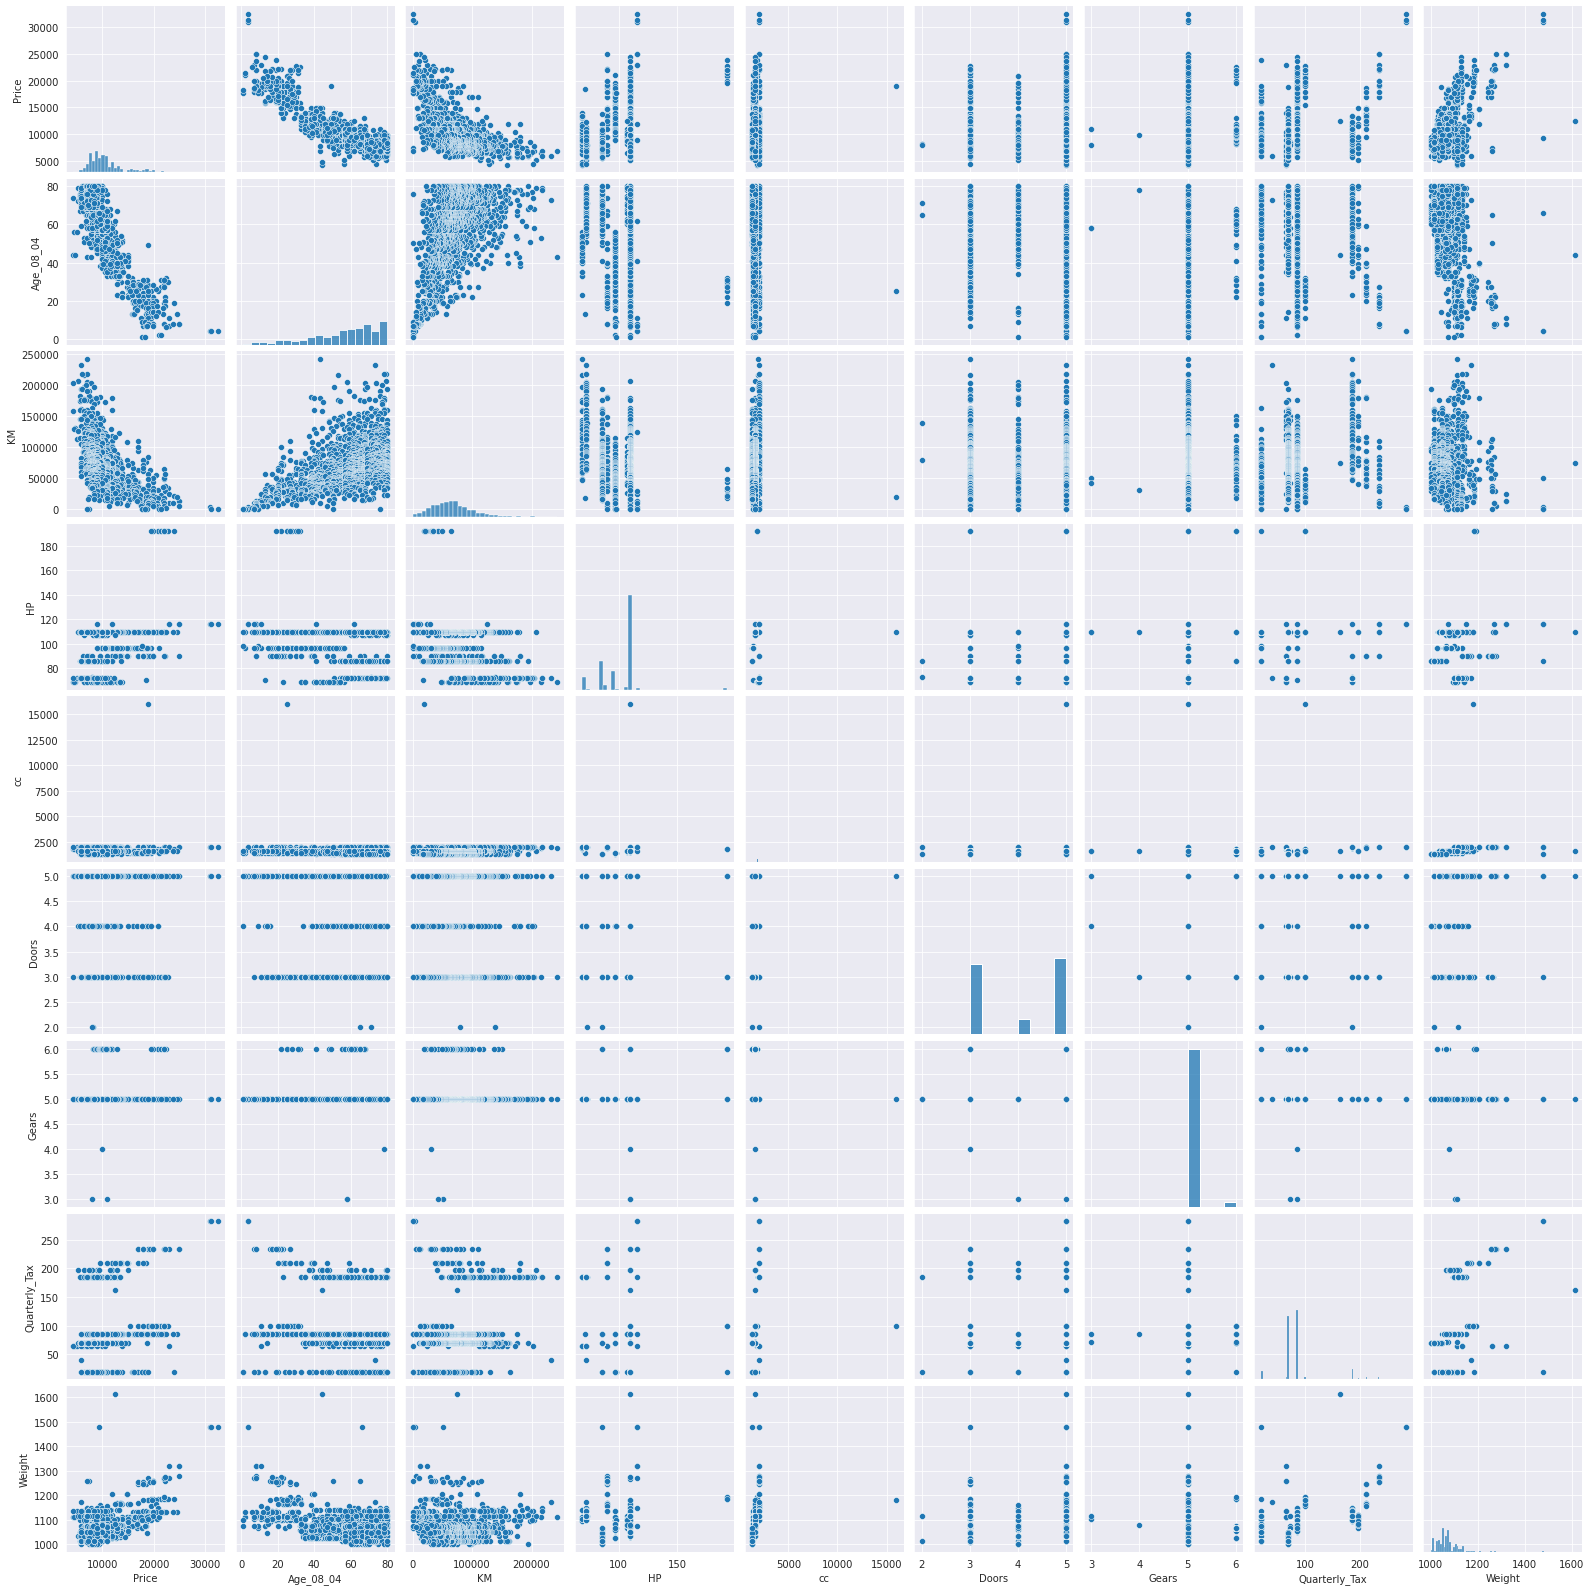

In [ ]:
sns.set_style(style='darkgrid')
sns.pairplot(df1)
plt.show()

# Finding Correlation Between Vareables

In [ ]:
df1.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


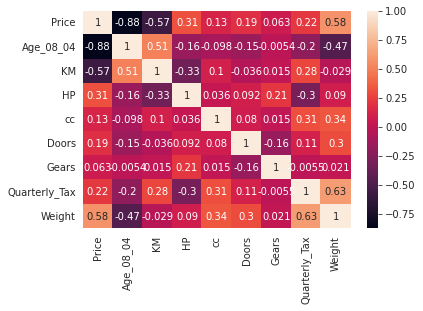

In [ ]:
sns.heatmap(df1.corr(), annot=True)

**Observation** > In this dataset our target vareable is "Price" whish is output and inputs are "Age_08_04,	KM,	HP,	cc,	Doors,	Gears,	Quarterly_Tax,	Weight"
- here we can see "Age_08_04" and "KM" are negatively correlated with "Price"

# Building the Model

In [ ]:
model = smf.ols("Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight",data=df1).fit()

In [ ]:
model.params

Intercept       -5573.106358
Age_08_04        -121.658402
KM                 -0.020817
HP                 31.680906
cc                 -0.121100
Doors              -1.616641
Gears             594.319936
Quarterly_Tax       3.949081
Weight             16.958632
dtype: float64

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Wed, 21 Sep 2022   Prob (F-statistic):               0.00
Time:                        08:14:01   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
Age_08_04      -121.6584      2.616    -46.512      0.000    -126.789    -116.527
KM               -0.0208      0.001    -16.622      0.000      -0.023      -0.018
HP               31.6809      2.818     11.241      0.000      26.152      37.209
cc               -0.1211      0.090     -1.344      0.179      -0.298       0.056
Doors            -1.6166     40.006     -0.040      0.968     -80.093      76.859
Gears           594.3199    197.055      3.016      0.003     207.771     980.869
Quarterly_Tax     3.9491      1.310      3.015      0.003       1.379       6.519
Weight           16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- Variabels **cc** and **doors** are insignificant to predict **Price** because p-value is greater than significant level (0.05) so we accepting the null hypothesis
- Variabels **Age_08_04**, **KP**, **HP**, **Gears**, **Quarterly_Tax** and **Weight** are significant to predict **Price** because p-value is lesser than significant level (0.05) so we are rejecting the null hypothesis 		

# Calculating VIF

In [ ]:
rsq_Age= smf.ols('Age_08_04~KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=df1).fit().rsquared
vif_Age=1/(1-rsq_Age)
vif_Age

1.8846198056602872

In [ ]:
rsq_km= smf.ols('KM~Age_08_04+HP+cc+Doors+Gears+Quarterly_Tax+Weight', data=df1).fit().rsquared
vif_km = 1/(1-rsq_km)
vif_km

1.7569047782042888

In [ ]:
rsq_hp= smf.ols('HP~Age_08_04+KM+cc+Doors+Gears+Quarterly_Tax+Weight', data=df1).fit().rsquared
vif_hp = 1/(1-rsq_hp)
vif_hp

1.4194221086310972

In [ ]:
rsq_cc= smf.ols('cc~Age_08_04+KM+HP+Doors+Gears+Quarterly_Tax+Weight', data=df1).fit().rsquared
vif_cc = 1/(1-rsq_cc)
vif_cc

1.1638939849423797

In [ ]:
rsq_door= smf.ols('Doors~Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight', data=df1).fit().rsquared
vif_door = 1/(1-rsq_door)
vif_door

1.156575207076044

In [ ]:
rsq_gear= smf.ols('Gears~Age_08_04+KM+HP+cc+Doors+Quarterly_Tax+Weight', data=df1).fit().rsquared
vif_gear = 1/(1-rsq_gear)
vif_gear

1.0987230193470372

In [ ]:
rsq_gear=rsq_gear.rsquared

In [ ]:
vif_gear = 1/(1-rsq_gear)
vif_gear

1.0987230193470372

In [ ]:
rsq_qt= smf.ols('Quarterly_Tax~Age_08_04+KM+HP+cc+Doors+Gears+Weight', data=df1).fit().rsquared
vif_qt = 1/(1-rsq_qt)
vif_qt

2.3114308115310376

In [ ]:
rsq_weight= smf.ols('Weight~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax', data=df1).fit().rsquared
vif_weight = 1/(1-rsq_weight)
vif_weight

2.516419837445868

In [ ]:
Vif ={'Variabels':['Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight'],'VIF':[vif_Age,vif_km,vif_hp,vif_cc,vif_door,vif_gear,vif_qt,vif_weight]}
vif_frame = pd.DataFrame(Vif)
vif_frame

,Variabels,VIF
0,Age_08_04,1.884620
1,KM,1.756905
2,HP,1.419422
3,cc,1.163894
4,Doors,1.156575
5,Gears,1.098723
6,Quarterly_Tax,2.311431
7,Weight,2.516420


**Observation** > After cheaking **VIF** all Veriabels are significant

# Cheaking the normality

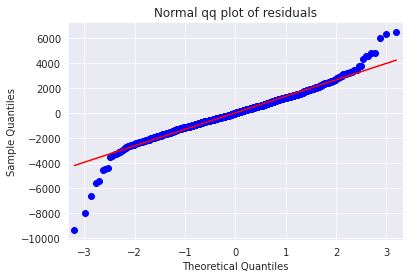

In [ ]:
# Cheaking the normality
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='r')
plt.title("Normal qq plot of residuals")
plt.show()

# Residual Plot for Homoscedasticity

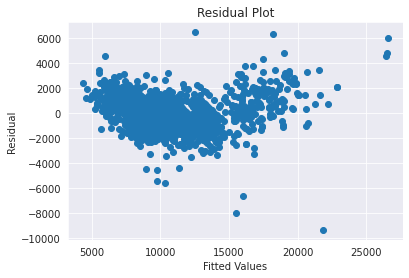

In [ ]:
plt.scatter(model.fittedvalues,model.resid)
plt.title("Residual Plot")
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.show()

# Detecting Influencers/Outliers
## Cook's Distance

In [ ]:
model_influence=model.get_influence()
(c, _)= model_influence.cooks_distance

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


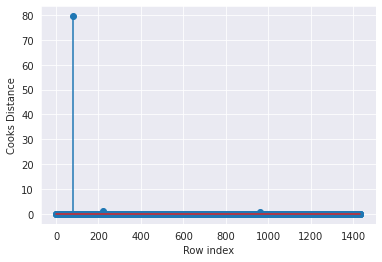

In [ ]:
#Ploting the influencers values using stem plot
plt.stem(np.arange(len(df1)),np.round(c, 3))
plt.xlabel("Row index")
plt.ylabel("Cooks Distance")
plt.show()

In [ ]:
(np.argmax(c),np.max(c))

(80, 79.52010624141955)

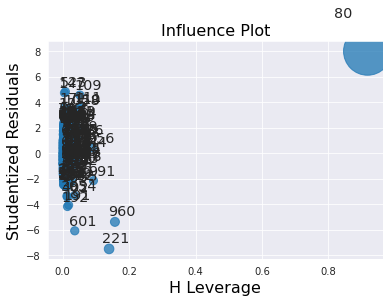

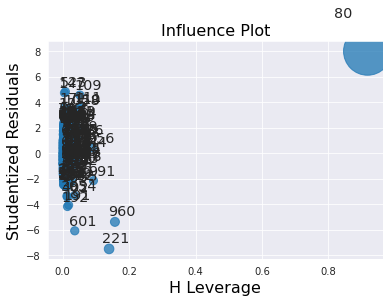

In [ ]:
model_influence.plot_influence()

**Observation** After detecting the influencers index 80 has highest cooks distence

# Dropping index "80" 

In [ ]:
df2=df1.drop(df1.index[[80]], axis=0).reset_index()

# Creatting a new model after dropping index **80** and excluding **cc** and **Doors** variable on behalf of
## Building model

In [ ]:
model2 = smf.ols("Price~Age_08_04+KM+HP+Gears+Quarterly_Tax+Weight",data=df2).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1502.
Date:                Wed, 21 Sep 2022   Prob (F-statistic):               0.00
Time:                        08:14:08   Log-Likelihood:                -12368.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1428   BIC:                         2.479e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5436.2633   1409.192     -3.858      0.000   -8200.572   -2671.954
Age_08_04      -121.6862      2.615    -46.529      0.000    -126.816    -116.556
KM               -0.0209      0.001    -16.750      0.000      -0.023      -0.018
HP               31.3510      2.799     11.199      0.000      25.860      36.842
Gears           599.5317    193.442      3.099      0.002     220.071     978.992
Quarterly_Tax     3.7685      1.297      2.906      0.004       1.225       6.312
Weight           16.6754      1.021     16.325      0.000      14.672      18.679
==============================================================================
Omnibus:                      146.725   Durbin-Watson:                   1.540
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              958.370
Skew:                          -0.200   Prob(JB):                    7.81e-209
Kurtosis:                       6.984   Cond. No.                     3.12e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.12e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Detecting Influencers/Outliers
## Cook's Distance

In [ ]:
model2_influence=model2.get_influence()
(c, _)= model2_influence.cooks_distance

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


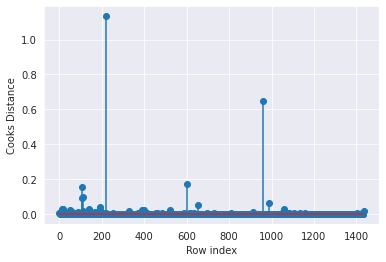

In [ ]:
#Ploting the influencers values using stem plot
plt.stem(np.arange(len(df2)),np.round(c, 3))
plt.xlabel("Row index")
plt.ylabel("Cooks Distance")
plt.show()

In [ ]:
(np.argmax(c),np.max(c))

(220, 1.1343827358915224)

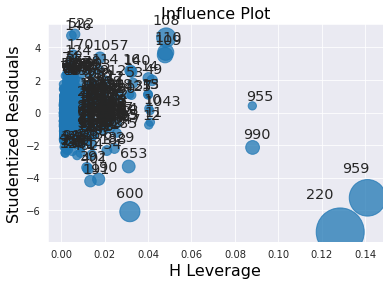

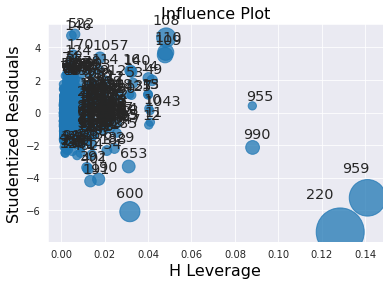

In [ ]:
model2_influence.plot_influence()

In [ ]:
# Droping index "220" and "959"
df3=df2.drop(df2.index[[220,959]], axis=0).reset_index()

# Building model by doping index **220** and **959**

In [ ]:
model3 =  smf.ols("Price~Age_08_04+KM+HP+Gears+Quarterly_Tax+Weight",data=df3).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     1623.
Date:                Wed, 21 Sep 2022   Prob (F-statistic):               0.00
Time:                        08:14:12   Log-Likelihood:                -12302.
No. Observations:                1433   AIC:                         2.462e+04
Df Residuals:                    1426   BIC:                         2.466e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.124e+04   1482.086     -7.584      0.000   -1.41e+04   -8332.982
Age_08_04      -116.0989      2.591    -44.812      0.000    -121.181    -111.017
KM               -0.0215      0.001    -17.753      0.000      -0.024      -0.019
HP               26.2524      2.763      9.503      0.000      20.833      31.672
Gears           638.8508    187.106      3.414      0.001     271.818    1005.884
Quarterly_Tax    -0.7066      1.338     -0.528      0.597      -3.331       1.918
Weight           22.5063      1.149     19.587      0.000      20.252      24.760
==============================================================================
Omnibus:                      129.094   Durbin-Watson:                   1.616
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              693.442
Skew:                          -0.210   Prob(JB):                    2.64e-151
Kurtosis:                       6.382   Cond. No.                     3.39e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.39e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Observation** > As our model performance incress by (0.009) percent after dorping "cc" and "Doors" variables and index 80,220 and 959 

In [ ]:
# Cheaking from cook's distance for any outlier
model3_influence=model3.get_influence()
(c, _)= model3_influence.cooks_distance

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


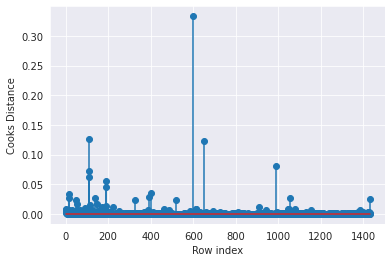

In [ ]:
#Ploting the influencers values using stem plot
plt.stem(np.arange(len(df3)),np.round(c, 3))
plt.xlabel("Row index")
plt.ylabel("Cooks Distance")
plt.show()

**Since the value is < 1, we can stop our diagnostic and finalize the model**

# Predicting the Model

In [ ]:
df_pred = pd.DataFrame({"Age_08_04":80, "KM":500, "HP":78, "Gears":7, "Quarterly_Tax":23, "Weight":1200},index=[1])

In [ ]:
model3.predict(df_pred)

1    12972.068479
dtype: float64